# Preparando o dataset

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Escolhendo a tabela que será utilizada

In [2]:
excel_file = pd.ExcelFile('/content/wuenic2023rev_web-update.xlsx')

In [3]:
print(excel_file.sheet_names)

['ReadMe', 'BCG', 'DTP1', 'DTP3', 'HEPB3', 'HEPBB', 'HIB3', 'IPV1', 'IPV2', 'MCV1', 'MCV2', 'MENGA', 'PCV3', 'POL3', 'RCV1', 'ROTAC', 'YFV', 'regional_global']


In [4]:
df_global = pd.read_excel('/content/wuenic2023rev_web-update.xlsx', sheet_name= 'regional_global')
df_global

,region,vaccine,year,coverage
0,Global,BCG,2000,80
1,Global,DTP1,2000,82
2,Global,DTP3,2000,72
3,Global,HEPB3,2000,29
4,Global,HEPBB,2000,5
...,...,...,...,...
2721,WCAR,PCV3,2023,64
2722,WCAR,POL3,2023,68
2723,WCAR,RCV1,2023,20
2724,WCAR,ROTAC,2023,56


In [5]:
# Verificação de dados únicos
print(df_global['region'].unique())
print(df_global['vaccine'].unique())
print(df_global['year'].unique())

['Global' 'EAPR' 'ECAR' 'ESAR' 'LACR' 'MENA' 'Non-programme' 'ROSA' 'WCAR']
['BCG' 'DTP1' 'DTP3' 'HEPB3' 'HEPBB' 'HIB3' 'MCV1' 'MCV2' 'POL3' 'RCV1'
 'YFV' 'ROTAC' 'PCV3' 'IPV1' 'MENGA' 'IPV2']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


# Questionamentos

## No ano mais recente do dataset (provavelmente 2022 ou 2023), quais são as 5 vacinas com a maior cobertura global e as 5 com a menor?

In [6]:
ultimo_ano = df_global['year'].max() # encontrando o último ano

df_inicio_fim = df_global[(df_global['year'] == ultimo_ano) & (df_global['region'] == 'Global')] # Filtrando pelo último ano e pela categoria global
df_inicio_fim

,region,vaccine,year,coverage
302,Global,BCG,2023,87
303,Global,DTP1,2023,89
304,Global,DTP3,2023,84
305,Global,HEPB3,2023,83
306,Global,HEPBB,2023,45
307,Global,HIB3,2023,77
308,Global,IPV1,2023,83
309,Global,IPV2,2023,42
310,Global,MCV1,2023,83
311,Global,MCV2,2023,74


In [7]:
# Ordenando do maior para o menor
df_ordenado = df_inicio_fim.sort_values(by = 'coverage', ascending = False)

# As 5 maiores com cobertura global no ano de 2023
df_ordenado.head(5)

,region,vaccine,year,coverage
303,Global,DTP1,2023,89
302,Global,BCG,2023,87
304,Global,DTP3,2023,84
305,Global,HEPB3,2023,83
308,Global,IPV1,2023,83


In [8]:
# A 5 menores com cobertura global no ano de 2023
df_ordenado.tail(5)

,region,vaccine,year,coverage
316,Global,ROTAC,2023,55
317,Global,YFV,2023,50
306,Global,HEPBB,2023,45
309,Global,IPV2,2023,42
312,Global,MENGA,2023,29


/tmp/ipython-input-378514492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_top5_maiores, x = 'coverage', y = 'vaccine', palette = 'viridis')


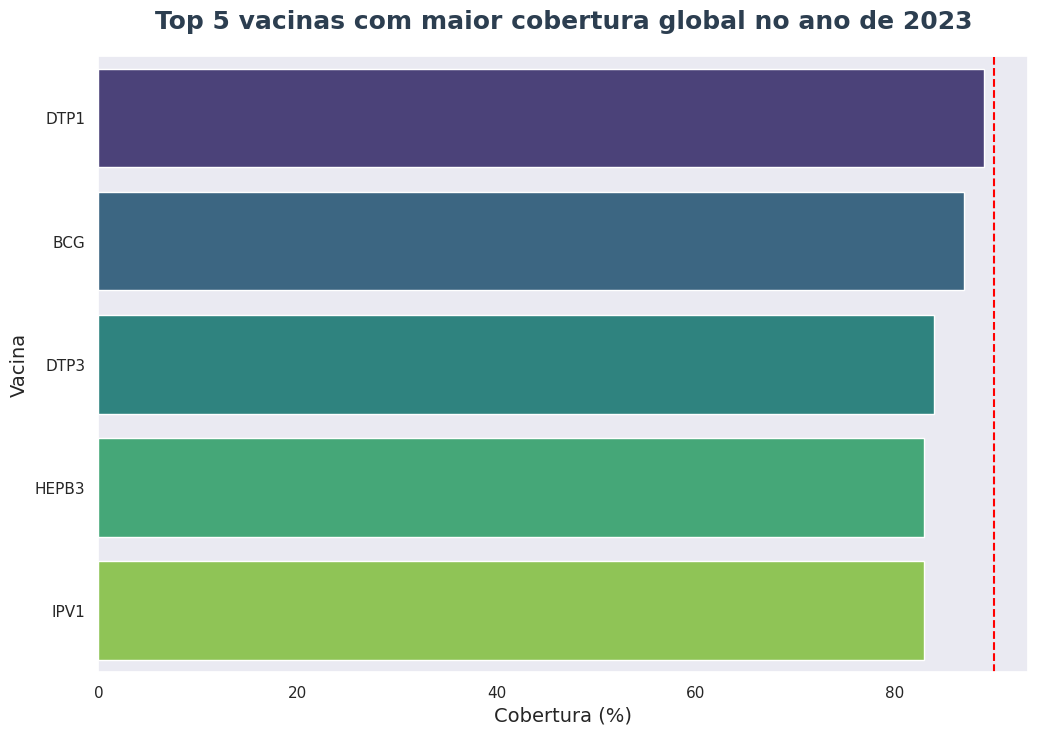

In [74]:
# Visualizando os dados em gráficos
df_top5_maiores = df_inicio_fim.sort_values(by = 'coverage', ascending = False).head(5)

plt.figure(figsize = (12,8))
sns.barplot(data= df_top5_maiores, x = 'coverage', y = 'vaccine', palette = 'viridis')
plt.axvline(90, color='red', linestyle='--', label='Meta Global (90%)')
plt.title('Top 5 vacinas com maior cobertura global no ano de 2023', fontsize = 18, pad = 20, color='#2c3e50', fontweight = 'bold')
plt.xlabel('Cobertura (%)', fontsize = 14)
plt.ylabel('Vacina', fontsize = 14)
plt.savefig('top5_vacinas_maior_cobertura.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipython-input-603688726.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_top5_menores, x = 'coverage', y = 'vaccine', palette = 'plasma')


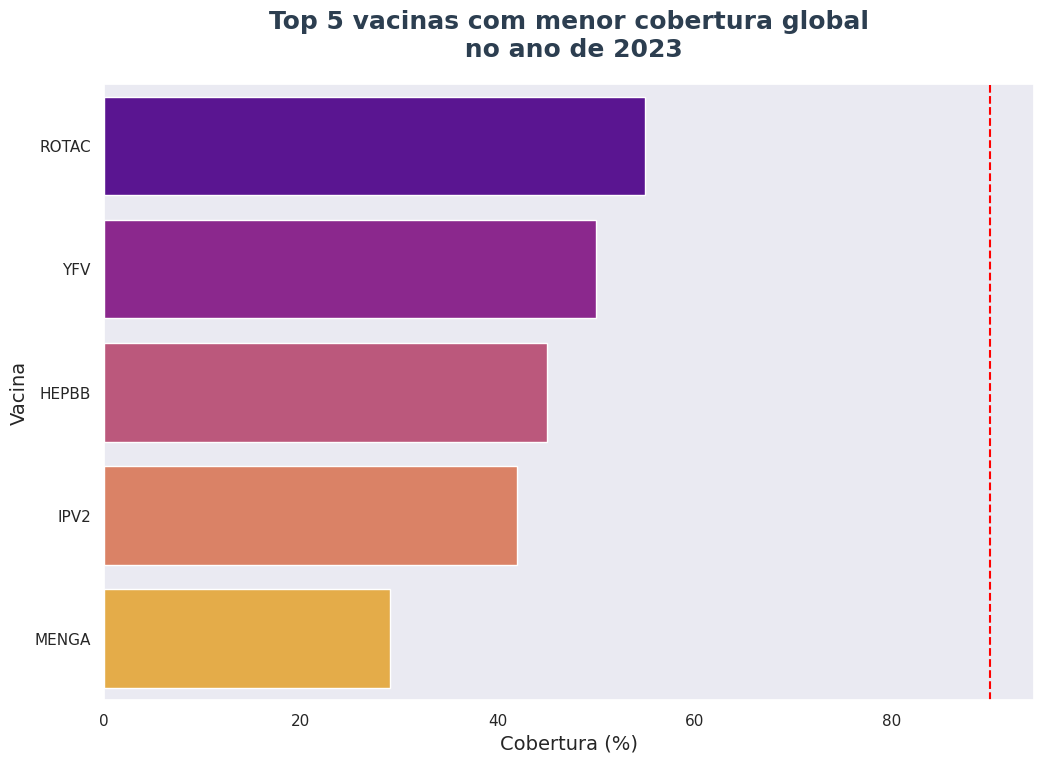

In [75]:
df_top5_menores = df_inicio_fim.sort_values(by = 'coverage', ascending = False).tail(5)

plt.figure(figsize = (12,8))
sns.barplot(data= df_top5_menores, x = 'coverage', y = 'vaccine', palette = 'plasma')
plt.axvline(90, color='red', linestyle='--', label='Meta Global (90%)')
plt.title('Top 5 vacinas com menor cobertura global\n no ano de 2023', fontsize = 18, pad = 20, color='#2c3e50', fontweight = 'bold')
plt.xlabel('Cobertura (%)', fontsize = 14)
plt.ylabel('Vacina', fontsize = 14)
plt.savefig('top5_vacinas_menor_cobertura.png', dpi=150, bbox_inches='tight')
plt.show()

Podemos observar que dentre todas as vacinas exploradas eplos gráficos, nem as maiores delas (DTP1 / DTP3: Tríplice bacteriana  - Difteria, Tétano e Coqueluche) chegam aos 90%, porém mesmo assim há uma alta taxa de cobertura global no ano de 2023.

Observamos que a menor cobertura durante aquele ano ficou a Vacina Meningocócica ACWY (conjugada) aqui no nosso dataset com o nome de MENGA.

## 2. O Impacto da Pandemia (Análise Temporal)
Pergunta: Se compararmos o ano de 2019 (pré-pandemia) com o ano de 2021 (pico do impacto na rotina), qual foi a queda percentual na cobertura da vacina DTP3 em cada região?

In [11]:
df_2019 = df_global[(df_global['year'] == 2019) & (df_global['region'] == 'Global')]
df_2021 = df_global[(df_global['year'] == 2021) & (df_global['region'] == 'Global')]

In [15]:
# Isolando o valor de DTP3 por ano

cobertura_dtp3_2019 = df_2019[df_2019['vaccine'] == 'DTP3']['coverage'].values[0]
cobertura_dtp3_2021 = df_2021[df_2021['vaccine'] == 'DTP3']['coverage'].values[0]

# Extraindo a diferença entre os anos
df_resultado = cobertura_dtp3_2019 - cobertura_dtp3_2021
print(f'A diferença entre os anos de 2019 e 2021 foi {df_resultado}%.')

A diferença entre os anos de 2019 e 2021 foi 5%.


### Conclusão

Comparando os anos de 2019 (pré-pandemia) e o ano de 2021 em escopo global houve uma diferença de 5%, ou seja, em 2019 a cobertura dessa vacina era maior e houve uma queda em comparação com 2021. Na escala global, 5% representam milhões de crianças que deixaram de ser vacinadas.

## 3. Desigualdade Regional (Agrupamento)
Pergunta: Qual é a média histórica (de todos os anos disponíveis) de cobertura vacinal para cada região do mundo? Existe alguma região que nunca conseguiu ultrapassar a marca de 80% de média?

In [23]:
df = pd.read_excel('/content/wuenic2023rev_web-update.xlsx', sheet_name= 'regional_global')

media_regional = df.groupby('region')['coverage'].mean().sort_values(ascending = False)
media_regional

,coverage
region,
Non-programme,79.716783
LACR,77.416129
ECAR,77.101399
EAPR,64.629371
MENA,64.273585
Global,57.525157
ROSA,53.136364
ESAR,47.305031
WCAR,42.716981


In [24]:
# Significado das siglas.

'''
WCAR: West and Central Africa (África Central e Ocidental)

ESAR: Eastern and Southern Africa (África Oriental e Austral)

ROSA: South Asia (Sul da Ásia)

MENA: Middle East and North Africa (Oriente Médio e Norte da África)

EAPR: East Asia and Pacific (Leste da Ásia e Pacífico)

ECAR: Europe and Central Asia (Europa e Ásia Central)

LACR: Latin America and Caribbean (América Latina e Caribe)
'''

'\nWCAR: West and Central Africa (África Central e Ocidental)\n\nESAR: Eastern and Southern Africa (África Oriental e Austral)\n\nROSA: South Asia (Sul da Ásia)\n\nMENA: Middle East and North Africa (Oriente Médio e Norte da África)\n\nEAPR: East Asia and Pacific (Leste da Ásia e Pacífico)\n\nECAR: Europe and Central Asia (Europa e Ásia Central)\n\nLACR: Latin America and Caribbean (América Latina e Caribe)\n'

/tmp/ipython-input-854511285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = media_regional.values, y = media_regional.index, palette = 'RdYlGn_r')


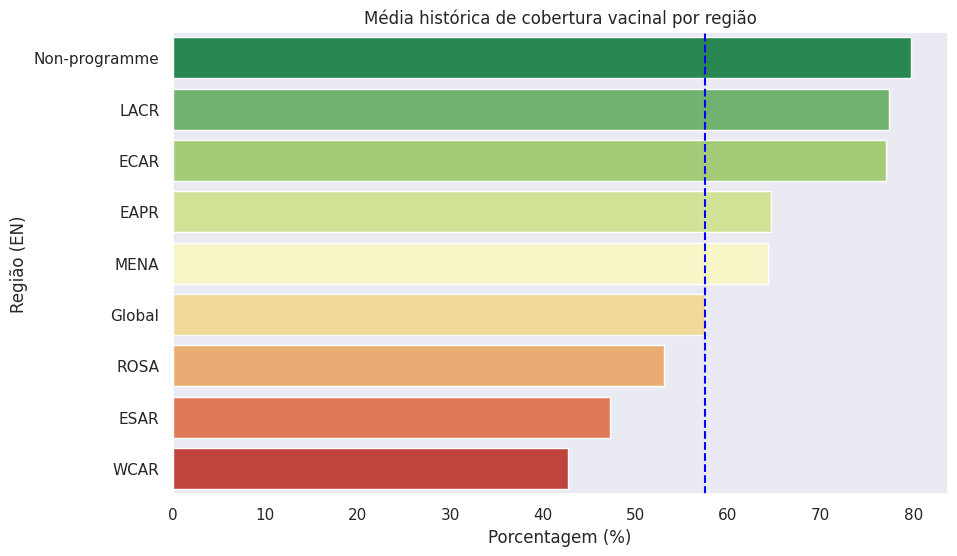

In [76]:
# Visualizando o gráfico

plt.figure(figsize = (10,6))

sns.barplot(x = media_regional.values, y = media_regional.index, palette = 'RdYlGn_r')
media_global_valor = media_regional['Global']
plt.axvline(media_global_valor, color='blue', linestyle='--', label=f'Média Global ({media_global_valor:.1f}%)')
plt.title('Média histórica de cobertura vacinal por região')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Região (EN)')
plt.savefig('media_historica_regiao.png', dpi=150, bbox_inches='tight')
plt.show()

### Conclusão

O Desafio dos 90%: Nenhuma região em desenvolvimento atinge a meta histórica de imunização. Países latino americanos são encontrados entre os com maior índice de vacinação. A diferença entre o maior (Non-programme - 79%) e o menor (WCAR - 42%) é de algo em volta de 37%.

## Consistência vs. Volatilidade (Estatística Descritiva)
Pergunta: Quais vacinas apresentam a maior variação (desvio padrão) na cobertura ao longo dos anos na região "Global"?

In [34]:
df = pd.read_excel('/content/wuenic2023rev_web-update.xlsx', sheet_name= 'regional_global')

In [37]:
# isolar a região, agrupar por vacina e calcular o Desvio Padrão (std)
df_variacao = df[df['region'] == 'Global'].groupby('vaccine')['coverage'].std().sort_values(ascending = False)
df_variacao

,coverage
vaccine,
HIB3,24.010867
IPV1,21.141061
MCV2,20.277781
PCV3,19.824963
RCV1,18.930077
ROTAC,18.623901
HEPB3,18.537858
HEPBB,12.665999
YFV,11.805719


/tmp/ipython-input-4052709521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_variacao.index, y = df_variacao.values, palette = 'winter_r')


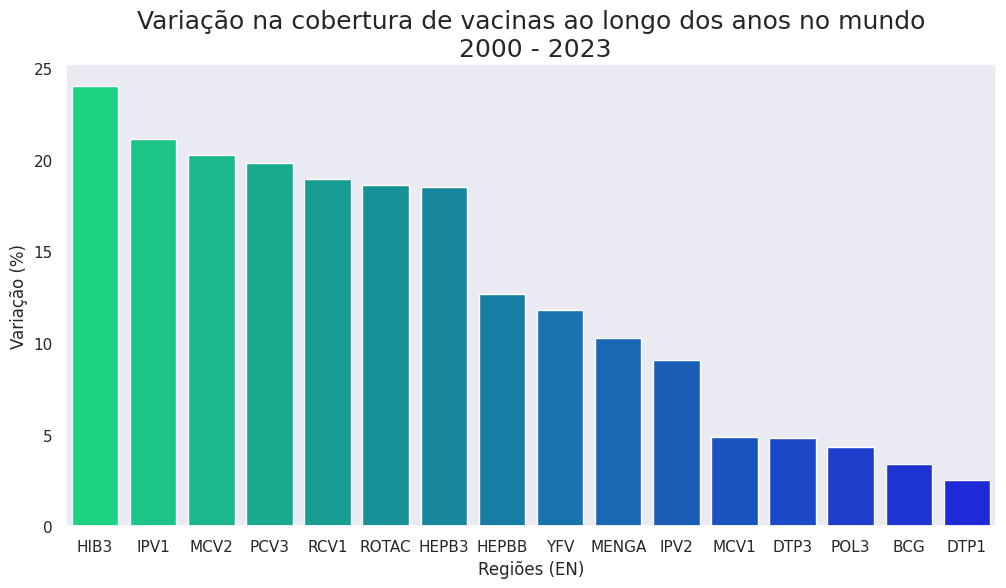

In [77]:
plt.figure(figsize = (12,6))
sns.set_theme(style= 'dark')
sns.barplot(x = df_variacao.index, y = df_variacao.values, palette = 'winter_r')
plt.title('Variação na cobertura de vacinas ao longo dos anos no mundo\n 2000 - 2023', fontsize = 18)
plt.xlabel('Regiões (EN)')
plt.ylabel('Variação (%)')
plt.savefig('variacao_vacinas.png', dpi=150, bbox_inches='tight')
plt.show()

### Conclusão

A alta volatilidade em vacinas como HIB3 e IPV1 reflete o esforço de expansão e introdução desses imunizantes no cenário global nas últimas décadas.

A baixa variação da BCG e DTP1 demonstra que são programas de vacinação maduros e estáveis, que mantêm coberturas consistentes ao longo dos anos, servindo como base para os sistemas de saúde.

## 5. O Desafio do "Alvo" (Lógica e Visualização)
Pergunta: A OMS/UNICEF geralmente estabelece uma meta de 90% de cobertura. Em quantos anos, nos últimos 10 anos, a região "Global" conseguiu bater essa meta para a vacina de Sarampo (geralmente identificada como MCV1)?

In [54]:
# filtrar dados
filtro_meta = df[(df['region'] == 'Global') & (df['vaccine'] ==  'MCV1') & (df['year'] >= 2013)]
filtro_meta

,region,vaccine,year,coverage
161,Global,MCV1,2013,84
174,Global,MCV1,2014,84
188,Global,MCV1,2015,84
202,Global,MCV1,2016,85
217,Global,MCV1,2017,85
232,Global,MCV1,2018,86
247,Global,MCV1,2019,86
262,Global,MCV1,2020,83
278,Global,MCV1,2021,81
294,Global,MCV1,2022,83


In [55]:
meta = filtro_meta['coverage'] >= 90
meta

,coverage
161,False
174,False
188,False
202,False
217,False
232,False
247,False
262,False
278,False
294,False


In [57]:
quantidade_anos = meta.sum()
print(quantidade_anos)

0


### Conclusão

A análise revela um cenário crítico para a imunização contra o Sarampo (MCV1). Apesar de ser uma das vacinas mais vitais, a cobertura global estagnou abaixo do limiar de segurança de 90% em todo o período analisado, atingindo o pico de apenas 86%. Isso explica por que ainda vemos surtos globais da doença.

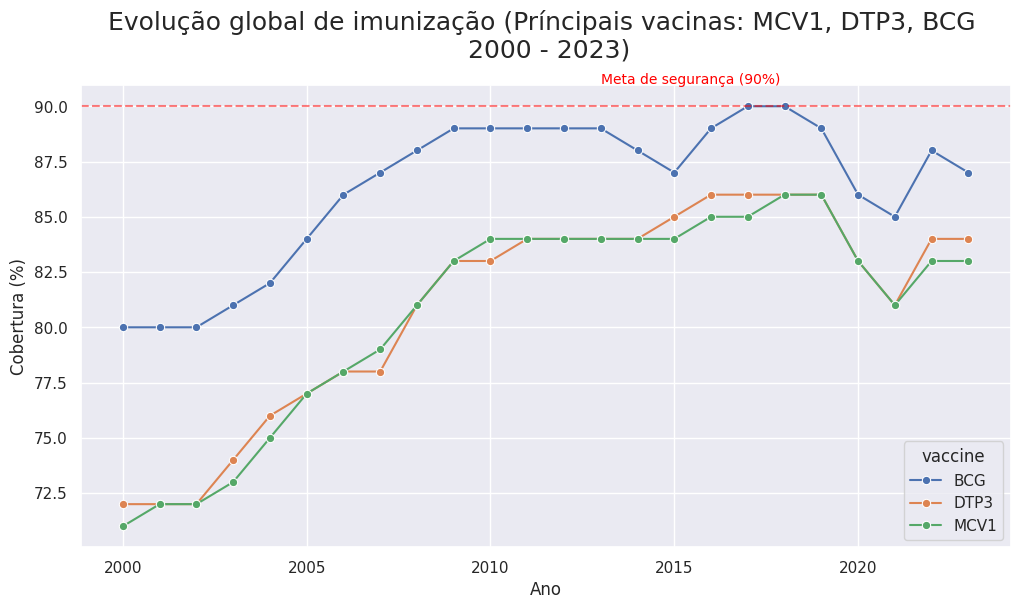

In [78]:
from matplotlib.lines import lineStyles
# Gráfico de linha do tempo

vacinas_principais = ['MCV1', 'DTP3', 'BCG']
df_evolucao = df[(df['region'] == 'Global') & (df['vaccine'].isin(vacinas_principais))]

plt.figure(figsize = (12,6))
sns.lineplot(data = df_evolucao, x = 'year', y = 'coverage', hue = 'vaccine', marker = 'o')

# linha de meta
plt.axhline(90, color = 'red', linestyle = '--', alpha = 0.5)
plt.text(2013, 91, 'Meta de segurança (90%)', color = 'red', fontsize = 10)

plt.title('Evolução global de imunização (Príncipais vacinas: MCV1, DTP3, BCG \n 2000 - 2023)', fontsize = 18, pad = 20)
plt.xlabel('Ano')
plt.ylabel('Cobertura (%)')
plt.grid(True)
plt.savefig('evolucao_vainas_principais.png', dpi=150, bbox_inches='tight')
plt.show()

Aqui uma conclusão rápida quando comparadas as principais vacinas no decorrer dos anos, onde somente a BCG atinge a linha de 90% indicada pela OMS, apesar do aumento das demais vacinas.